# Задание 1. Введение в QEPM (Quantitative Equity Portfolio Management)

## Цель задания:
### 1. Получить первичные навыки работы с финансовой информацией с помощью языка Python
### 2. Провести первичный анализ фундаментальных и рыночных показателей выбранных компаний 

### В данном задании используются данные по фундаментальным показателям американских компаний. Исходные данные взяты с сайта http://simfin.com.

### Рекомендуемая литература:
### 1.Y.Hilpish "Python for Finance"
### 2.J.M. Weiming "Mastering Python for Finance"
### 3.W. McKinney "Python for Data Analysis"

## 1. Загрузка библиотек

In [1]:
import numpy as np #  библиотека numpy
import pandas as pd# библиотека panadas

In [2]:
from __future__ import division # отображение результатов деления

In [3]:
from pandas_datareader import data# библиотека загрузка данных из интернета

In [4]:
import matplotlib.pyplot as plt # графическая библиотека
%matplotlib inline

## 2. Загрузка данных

In [5]:
path='/home/maxime/Documentos/Strategies/'

In [6]:
comp=pd.read_csv(path+'indicators_file_yahoo.csv')# массив данных с фундаментальными показателями

In [7]:
comp.head()

,Ticker,Name,Sector,Industry,MarketCap,EPS,PE,PS,BookMarket,DivRatio
0,DDD,3D Systems Corporation,Technology,Computer Software: Prepackaged Software,2.045077e+09,-0.46,-26.52,2.00,0.42,0.00
1,MMM,3M Company,Health Care,Medical/Dental Instruments,1.233179e+11,7.64,25.57,3.53,0.09,5.24
2,EGHT,8x8 Inc,Technology,EDP Services,1.816977e+09,-1.47,-11.86,6.35,0.14,0.00
4,AHC,A.H. Belo Corporation,Consumer Services,Newspapers/Magazines,9.687409e+07,0.33,13.41,0.45,NaN,0.47
5,AOS,A.O Smith Corporation,Consumer Durables,Consumer Electronics/Appliances,1.363486e+09,1.99,22.99,2.49,1.47,0.68


In [8]:
comp.shape # размер массива

(1518, 10)

In [9]:
comp.dtypes

Ticker         object
Name           object
Sector         object
Industry       object
MarketCap     float64
EPS           float64
PE            float64
PS            float64
BookMarket    float64
DivRatio      float64
dtype: object

In [10]:
comp[comp.Ticker=='AAPL']

,Ticker,Name,Sector,Industry,MarketCap,EPS,PE,PS,BookMarket,DivRatio
874,AAPL,Apple Inc.,Technology,Computer Manufacturing,1.083304e+12,12.23,13.75,3.12,0.15,2.87


In [11]:
comp.Sector.unique()

array(['Technology', 'Health Care', 'Consumer Services',
       'Consumer Durables', 'Capital Goods', 'Finance', 'Miscellaneous',
       'Basic Industries', 'Transportation', 'Public Utilities',
       'Consumer Non-Durables', 'Energy', nan], dtype=object)

In [12]:
comp[comp.Sector=='Energy'].shape

(75, 10)

### Сформируем выборку из 20 крупнейших компаний по показателю капитализации, 10 компаний из энергетического сектора и 10 компаний из сектора IT

In [13]:
index_l_energy=list(comp[comp.Sector=='Energy'].MarketCap.nlargest(10).index)  
# индексы (номера) наблюдений для 10 крупнейших энергетических компаний

In [14]:
comp.loc[index_l_energy,:]

,Ticker,Name,Sector,Industry,MarketCap,EPS,PE,PS,BookMarket,DivRatio
296,XOM,Exxon Mobil Corporation,Energy,Integrated oil Companies,3.646581e+11,5.44,14.51,1.26,0.59,3.18
176,CVX,Chevron Corporation,Energy,Integrated oil Companies,2.392118e+11,7.49,15.94,1.46,0.68,4.44
326,GE,General Electric Company,Energy,Consumer Electronics/Appliances,1.182856e+11,-3.65,-3.10,0.79,0.49,0.63
204,COP,ConocoPhillips,Energy,Integrated oil Companies,9.096882e+10,19.97,3.21,0.55,0.43,4.44
629,SLB,Schlumberger N.V.,Energy,Oilfield Services/Equipment,8.705562e+10,-0.47,-108.94,2.18,0.52,2.00
280,EOG,"EOG Resources, Inc.",Energy,Oil & Gas Production,7.519764e+10,8.60,11.90,3.68,0.30,0.71
530,OXY,Occidental Petroleum Corporation,Energy,Oil & Gas Production,6.224833e+10,5.13,13.90,3.29,0.40,3.10
567,PSX,Phillips 66,Energy,Integrated oil Companies,5.484796e+10,13.59,7.34,0.42,0.56,2.95
753,VLO,Valero Energy Corporation,Energy,Integrated oil Companies,5.047715e+10,10.55,7.50,0.30,0.68,3.11
269,EMR,Emerson Electric Company,Energy,Consumer Electronics/Appliances,4.908402e+10,3.49,19.37,2.45,0.22,1.94


In [15]:
index_l_tech=list(comp[comp.Sector=='Technology'].MarketCap.nlargest(10).index)
# индексы (номера) наблюдений для 10 крупнейших  компаний сектора IT

In [16]:
comp.loc[index_l_tech,:]

,Ticker,Name,Sector,Industry,MarketCap,EPS,PE,PS,BookMarket,DivRatio
874,AAPL,Apple Inc.,Technology,Computer Manufacturing,1.083304e+12,12.23,13.75,3.12,0.15,2.87
1235,MSFT,Microsoft Corporation,Technology,Computer Software: Prepackaged Software,8.500219e+11,2.45,45.76,7.49,0.10,1.68
852,GOOG,Alphabet Inc.,Technology,"Computer Software: Programming, Data Processing",7.993129e+11,27.01,39.10,5.65,0.23,0.00
1054,FB,"Facebook, Inc.",Technology,"Computer Software: Programming, Data Processing",4.540151e+11,6.73,22.53,8.46,0.18,0.00
1149,INTC,Intel Corporation,Technology,Semiconductors,2.272216e+11,3.27,13.57,2.97,0.35,1.17
964,CSCO,"Cisco Systems, Inc.",Technology,Computer Communications Equipment,2.200183e+11,0.27,177.63,4.47,0.21,1.27
542,ORCL,Oracle Corporation,Technology,Computer Software: Prepackaged Software,1.964700e+11,0.97,49.97,4.94,0.21,0.76
1288,NVDA,NVIDIA Corporation,Technology,Semiconductors,1.759309e+11,7.73,19.16,7.24,0.10,0.60
399,IBM,International Business Machines Corporation,Technology,Computer Manufacturing,1.360298e+11,6.23,19.27,1.37,0.18,6.14
825,ADBE,Adobe Inc.,Technology,Computer Software: Prepackaged Software,1.332182e+11,4.91,48.46,13.65,0.08,0.00


In [17]:
sample=comp.loc[index_l_tech+index_l_energy,:]
# формирование выборки

## 4. Загрузка дневных котировок по отобранным компаниям с сервера Yahoo Finance

In [18]:
sample_tickers=list(sample.Ticker)
# выбор тикеров для загрузки с сервера Yahoo finance

In [19]:
df = data.DataReader(sample_tickers, 
                       start='2017-12-29', 
                       end='2018-12-31', 
                       data_source='yahoo')['Close']
# загрузка дневных котировок

In [20]:
sample.shape

(20, 10)

In [21]:
df.head()

Symbols,AAPL,MSFT,GOOG,FB,INTC,CSCO,ORCL,NVDA,IBM,ADBE,XOM,CVX,GE,COP,SLB,EOG,OXY,PSX,VLO,EMR
Date,,,,,,,,,,,,,,,,,,,,
2017-12-29,169.229996,85.540001,1046.400024,176.460007,46.160000,38.299999,47.279999,193.500000,153.419998,175.240005,83.639999,125.190002,16.778847,54.889999,67.389999,107.910004,73.660004,101.150002,91.910004,69.690002
2018-01-02,172.259995,85.949997,1065.000000,181.419998,46.849998,38.860001,46.630001,199.350006,154.250000,177.699997,85.029999,127.580002,17.288462,55.320000,69.519997,109.300003,73.980003,101.750000,92.800003,70.739998
2018-01-03,172.229996,86.349998,1082.479980,184.669998,45.259998,39.169998,47.709999,212.470001,158.490005,181.039993,86.699997,128.509995,17.451923,56.340000,71.330002,110.930000,75.000000,102.430000,93.290001,71.389999
2018-01-04,173.029999,87.110001,1086.400024,184.330002,44.430000,38.990002,48.180000,213.589996,161.699997,183.220001,86.820000,128.110001,17.817308,56.990002,73.099998,110.949997,74.959999,102.150002,93.589996,71.489998
2018-01-05,175.000000,88.190002,1102.229980,186.850006,44.740002,39.529999,48.470001,215.399994,162.490005,185.339996,86.750000,127.900002,17.826923,56.880001,73.599998,112.169998,74.550003,102.160004,94.029999,72.430000


In [22]:
df.index

DatetimeIndex(['2017-12-29', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [23]:
df.to_csv(path+'sample.csv')# сохранение массива в файле формата csv

### Загрзуку данных из интернета следует реализовать один раз. При последующей отладке вышеприведенные команды следует "закомментарить"

In [24]:
prices=pd.read_csv(path+'sample.csv',index_col='Date',parse_dates=True)# выгрузка массива из файла

In [25]:
prices.head()

,AAPL,MSFT,GOOG,FB,INTC,CSCO,ORCL,NVDA,IBM,ADBE,XOM,CVX,GE,COP,SLB,EOG,OXY,PSX,VLO,EMR
Date,,,,,,,,,,,,,,,,,,,,
2017-12-29,169.229996,85.540001,1046.400024,176.460007,46.160000,38.299999,47.279999,193.500000,153.419998,175.240005,83.639999,125.190002,16.778847,54.889999,67.389999,107.910004,73.660004,101.150002,91.910004,69.690002
2018-01-02,172.259995,85.949997,1065.000000,181.419998,46.849998,38.860001,46.630001,199.350006,154.250000,177.699997,85.029999,127.580002,17.288462,55.320000,69.519997,109.300003,73.980003,101.750000,92.800003,70.739998
2018-01-03,172.229996,86.349998,1082.479980,184.669998,45.259998,39.169998,47.709999,212.470001,158.490005,181.039993,86.699997,128.509995,17.451923,56.340000,71.330002,110.930000,75.000000,102.430000,93.290001,71.389999
2018-01-04,173.029999,87.110001,1086.400024,184.330002,44.430000,38.990002,48.180000,213.589996,161.699997,183.220001,86.820000,128.110001,17.817308,56.990002,73.099998,110.949997,74.959999,102.150002,93.589996,71.489998
2018-01-05,175.000000,88.190002,1102.229980,186.850006,44.740002,39.529999,48.470001,215.399994,162.490005,185.339996,86.750000,127.900002,17.826923,56.880001,73.599998,112.169998,74.550003,102.160004,94.029999,72.430000


In [26]:
prices.dtypes

AAPL    float64
MSFT    float64
GOOG    float64
FB      float64
INTC    float64
CSCO    float64
ORCL    float64
NVDA    float64
IBM     float64
ADBE    float64
XOM     float64
CVX     float64
GE      float64
COP     float64
SLB     float64
EOG     float64
OXY     float64
PSX     float64
VLO     float64
EMR     float64
dtype: object

In [27]:
prices.index

DatetimeIndex(['2017-12-29', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

## 5. Расчет доходностей для различных периодов времени

In [28]:
returns=prices.copy()

In [29]:
returns=returns.pct_change()# дневная доходность

In [30]:
returns.head()

,AAPL,MSFT,GOOG,FB,INTC,CSCO,ORCL,NVDA,IBM,ADBE,XOM,CVX,GE,COP,SLB,EOG,OXY,PSX,VLO,EMR
Date,,,,,,,,,,,,,,,,,,,,
2017-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,0.017905,0.004793,0.017775,0.028108,0.014948,0.014621,-0.013748,0.030233,0.005410,0.014038,0.016619,0.019091,0.030372,0.007834,0.031607,0.012881,0.004344,0.005932,0.009683,0.015067
2018-01-03,-0.000174,0.004654,0.016413,0.017914,-0.033938,0.007977,0.023161,0.065814,0.027488,0.018796,0.019640,0.007289,0.009455,0.018438,0.026036,0.014913,0.013787,0.006683,0.005280,0.009189
2018-01-04,0.004645,0.008801,0.003621,-0.001841,-0.018338,-0.004595,0.009851,0.005271,0.020254,0.012042,0.001384,-0.003113,0.020937,0.011537,0.024814,0.000180,-0.000533,-0.002734,0.003216,0.001401
2018-01-05,0.011385,0.012398,0.014571,0.013671,0.006977,0.013850,0.006019,0.008474,0.004886,0.011571,-0.000806,-0.001639,0.000540,-0.001930,0.006840,0.010996,-0.005470,0.000098,0.004701,0.013149


In [31]:
returns=returns.iloc[1:,:]# удаление первого наблюдения nan

In [32]:
prices.iloc[0,0],prices.iloc[prices.shape[0]-1,0]

(169.22999572753906, 157.74000549316406)

In [33]:
prices.iloc[prices.shape[0]-1,0]/prices.iloc[0,0]

0.9321042928295411

In [34]:
returns_cum=(1+returns).cumprod()# раcчет кумулятивной доходности

In [35]:
returns_cum.tail()

,AAPL,MSFT,GOOG,FB,INTC,CSCO,ORCL,NVDA,IBM,ADBE,XOM,CVX,GE,COP,SLB,EOG,OXY,PSX,VLO,EMR
Date,,,,,,,,,,,,,,,,,,,,
2018-12-24,0.867636,1.100421,0.932932,0.703049,0.944324,1.051697,0.902919,0.656744,0.701147,1.170737,0.783238,0.806694,0.396562,1.038623,0.522184,0.767862,0.775319,0.776075,0.750082,0.796240
2018-12-26,0.928736,1.175590,0.993368,0.760399,1.000650,1.108877,0.943105,0.687855,0.726046,1.272255,0.820660,0.857816,0.423496,1.120423,0.543256,0.824669,0.822699,0.832427,0.797628,0.839001
2018-12-27,0.922709,1.182838,0.997592,0.762326,1.004333,1.120366,0.951142,0.677881,0.741624,1.284752,0.824247,0.873233,0.416619,1.133722,0.539101,0.822815,0.824871,0.848443,0.811990,0.851342
2018-12-28,0.923181,1.173603,0.991093,0.754845,1.012782,1.116710,0.947970,0.690698,0.736736,1.273282,0.815041,0.867881,0.430372,1.123520,0.543107,0.811046,0.820934,0.839941,0.799478,0.848472
2018-12-31,0.932104,1.187398,0.989688,0.742888,1.016681,1.131332,0.954949,0.689922,0.740907,1.291029,0.815280,0.868999,0.433811,1.135908,0.535391,0.808173,0.833288,0.851705,0.815689,0.857368


In [36]:
returns_cum.resample('BM').last().pct_change().head()# раcчет кумулятивной месячной доходности

,AAPL,MSFT,GOOG,FB,INTC,CSCO,ORCL,NVDA,IBM,ADBE,XOM,CVX,GE,COP,SLB,EOG,OXY,PSX,VLO,EMR
Date,,,,,,,,,,,,,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,0.063848,-0.013051,-0.055738,-0.045856,0.023889,0.077997,-0.017833,-0.015460,-0.048076,0.046906,-0.132417,-0.107140,-0.127396,-0.076518,-0.107910,-0.118087,-0.124983,-0.117480,-0.057831,-0.016198
2018-03-30,-0.058051,-0.026661,-0.066025,-0.103914,0.056604,-0.042206,-0.097099,-0.043017,-0.015401,0.033233,-0.014919,0.018942,-0.044649,0.091696,-0.013102,0.037961,-0.009756,0.061414,0.025990,-0.038840
2018-04-30,-0.015020,0.024652,-0.014015,0.076413,-0.008833,0.032642,-0.001749,-0.028887,-0.055204,0.025546,0.042086,0.097071,0.043769,0.104739,0.058351,0.122542,0.189347,0.160446,0.195753,-0.027672
2018-05-31,0.130764,0.056886,0.066507,0.115000,0.069353,-0.035674,0.022991,0.121343,-0.025179,0.124910,0.044887,-0.006474,0.000711,0.028855,0.001604,-0.003046,0.089826,0.046537,0.092581,0.066707


In [37]:
returns_cum_m=(1+returns).resample('M',kind='period').prod()-1# раcчет кумулятивной месячной доходности
# второй способ

In [38]:
returns_cum_m.head()

,AAPL,MSFT,GOOG,FB,INTC,CSCO,ORCL,NVDA,IBM,ADBE,XOM,CVX,GE,COP,SLB,EOG,OXY,PSX,VLO,EMR
Date,,,,,,,,,,,,,,,,,,,,
2018-01,-0.010636,0.110708,0.118062,0.059107,0.042894,0.084595,0.091159,0.270284,0.067006,0.139922,0.043759,0.001278,-0.073352,0.071416,0.091853,0.065703,0.017784,0.012358,0.044174,0.036447
2018-02,0.063848,-0.013051,-0.055738,-0.045856,0.023889,0.077997,-0.017833,-0.015460,-0.048076,0.046906,-0.132417,-0.107140,-0.127396,-0.076518,-0.107910,-0.118087,-0.124983,-0.117480,-0.057831,-0.016198
2018-03,-0.058051,-0.026661,-0.066025,-0.103914,0.056604,-0.042206,-0.097099,-0.043017,-0.015401,0.033233,-0.014919,0.018942,-0.044649,0.091696,-0.013102,0.037961,-0.009756,0.061414,0.025990,-0.038840
2018-04,-0.015020,0.024652,-0.014015,0.076413,-0.008833,0.032642,-0.001749,-0.028887,-0.055204,0.025546,0.042086,0.097071,0.043769,0.104739,0.058351,0.122542,0.189347,0.160446,0.195753,-0.027672
2018-05,0.130764,0.056886,0.066507,0.115000,0.069353,-0.035674,0.022991,0.121343,-0.025179,0.124910,0.044887,-0.006474,0.000711,0.028855,0.001604,-0.003046,0.089826,0.046537,0.092581,0.066707


## 6. Анализ фундаментальных и рыночных показателей

### Объединение массива фундаментальных показателей и массива годовой доходности

In [39]:
sample.drop(columns=['Industry'],inplace=True)

In [40]:
sample.reset_index(drop=True,inplace=True)

In [41]:
df=pd.DataFrame(returns_cum.iloc[returns_cum.shape[0]-1,:])
# вспомогательный массив с показателем годовой доходности

In [42]:
df.columns=['Return']

In [43]:
df['Ticker']=df.index

In [44]:
df.reset_index(drop=True,inplace=True)

In [45]:
df.head()

,Return,Ticker
0,0.932104,AAPL
1,1.187398,MSFT
2,0.989688,GOOG
3,0.742888,FB
4,1.016681,INTC


In [46]:
sample=sample.merge(df) # объединение массивов

In [47]:
sample.head()

,Ticker,Name,Sector,MarketCap,EPS,PE,PS,BookMarket,DivRatio,Return
0,AAPL,Apple Inc.,Technology,1.083304e+12,12.23,13.75,3.12,0.15,2.87,0.932104
1,MSFT,Microsoft Corporation,Technology,8.500219e+11,2.45,45.76,7.49,0.10,1.68,1.187398
2,GOOG,Alphabet Inc.,Technology,7.993129e+11,27.01,39.10,5.65,0.23,0.00,0.989688
3,FB,"Facebook, Inc.",Technology,4.540151e+11,6.73,22.53,8.46,0.18,0.00,0.742888
4,INTC,Intel Corporation,Technology,2.272216e+11,3.27,13.57,2.97,0.35,1.17,1.016681


### Группировка компаний по секторам и нахождение максимальных и минимальных значений по каждому показателю для каждого сектора

In [48]:
sector_group=sample.iloc[:,2:].groupby('Sector')

In [49]:
sector_group.agg(['min','max'])

MarketCap                 EPS             PE            PS  \
                     min           max   min    max     min     max   min   
Sector                                                                      
Energy      4.908402e+10  3.646581e+11 -3.65  19.97 -108.94   19.37  0.30   
Technology  1.332182e+11  1.083304e+12  0.27  27.01   13.57  177.63  1.37   

                  BookMarket       DivRatio          Return            
              max        min   max      min   max       min       max  
Sector                                                                 
Energy       3.68       0.22  0.68     0.63  4.44  0.433811  1.135908  
Technology  13.65       0.08  0.35     0.00  6.14  0.689922  1.291029

###  Ранжирование компаний сектора IT  по показателю годовой доходности акций (без учета дивидендов)

In [50]:
sample[sample.Sector=='Technology'][['Ticker','Return']].sort_values(by='Return',ascending=False)

,Ticker,Return
9,ADBE,1.291029
1,MSFT,1.187398
5,CSCO,1.131332
4,INTC,1.016681
2,GOOG,0.989688
6,ORCL,0.954949
0,AAPL,0.932104
3,FB,0.742888
8,IBM,0.740907
7,NVDA,0.689922


### Группировка компаний по покзателю годовой доходности акций и медианные значения показателя PE для каждой группы

In [51]:
sample['PE'].groupby(pd.qcut(sample.Return,4)).agg(np.median)

Return
(0.433, 0.792]    19.16
(0.792, 0.855]    11.90
(0.855, 0.996]    19.37
(0.996, 1.291]    45.76
Name: PE, dtype: float64

### Визуализация динамики дневных котировок акций Apple

/home/maxime/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


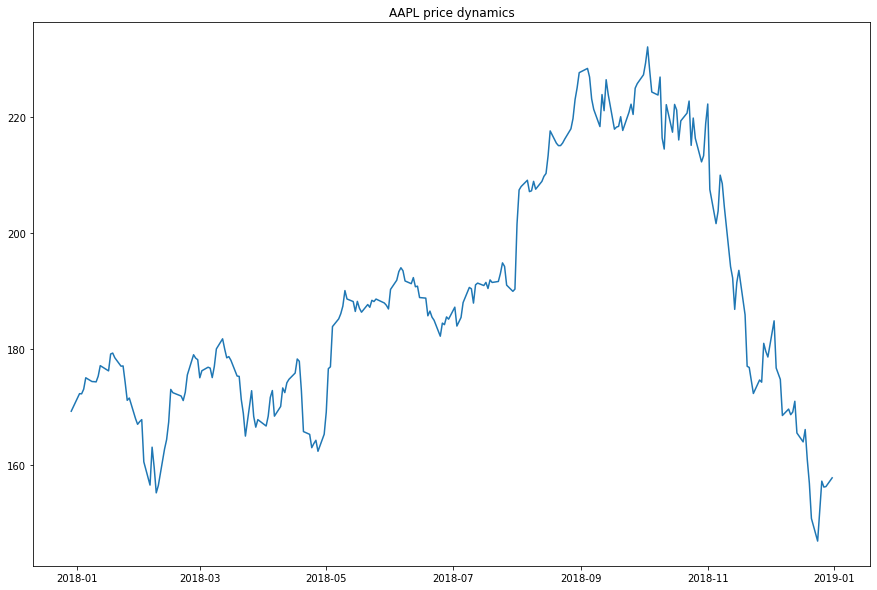

In [52]:
plt.figure(figsize=(15,10))
_=plt.plot(prices.AAPL)
_=plt.title('AAPL price dynamics')

### Визуализация динамики дневных котировок акций Microsoft

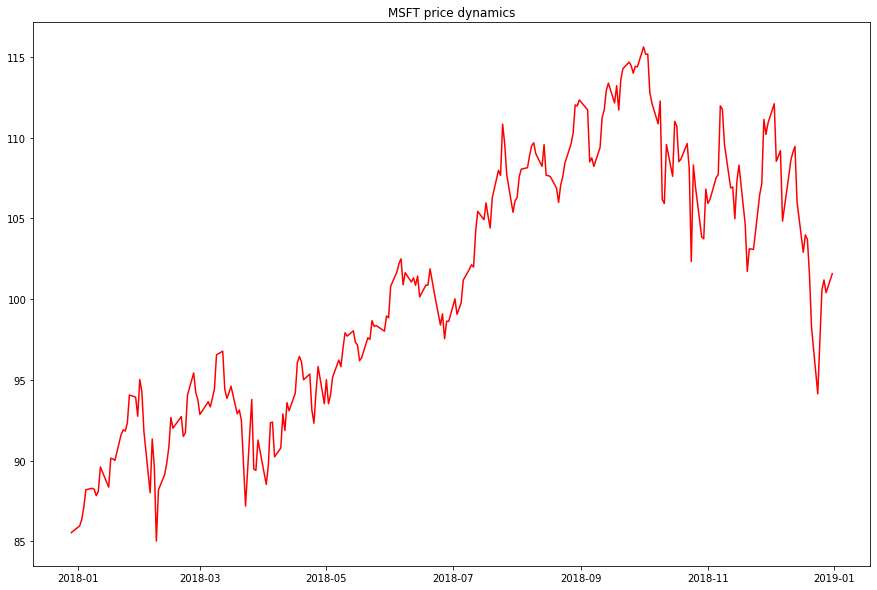

In [53]:
plt.figure(figsize=(15,10))
_=plt.plot(prices.MSFT,color='red')
_=plt.title('MSFT price dynamics')

### Визуализация кумулятивной доходности компаний энергетического сектора

In [54]:
tickers_energy=list(sample[sample.Sector=='Energy']['Ticker']) # вспомогательный список тикеров

In [55]:
tickers_energy

['XOM', 'CVX', 'GE', 'COP', 'SLB', 'EOG', 'OXY', 'PSX', 'VLO', 'EMR']

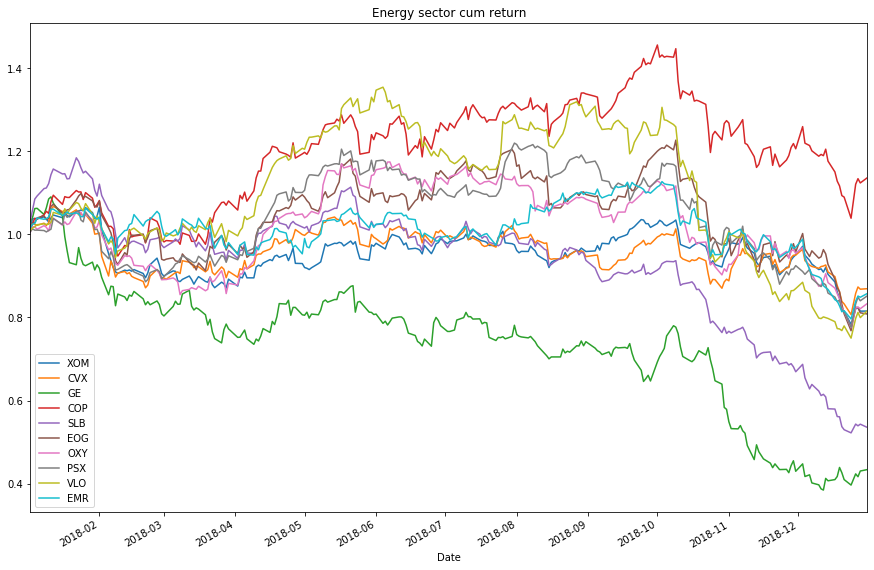

In [56]:
p=returns_cum[tickers_energy].plot(figsize=(15,10),title='Energy sector cum return')

### Визуализация кумулятивной доходности компаний  сектора IT

In [57]:
tickers_tech=list(sample[sample.Sector=='Technology']['Ticker'])

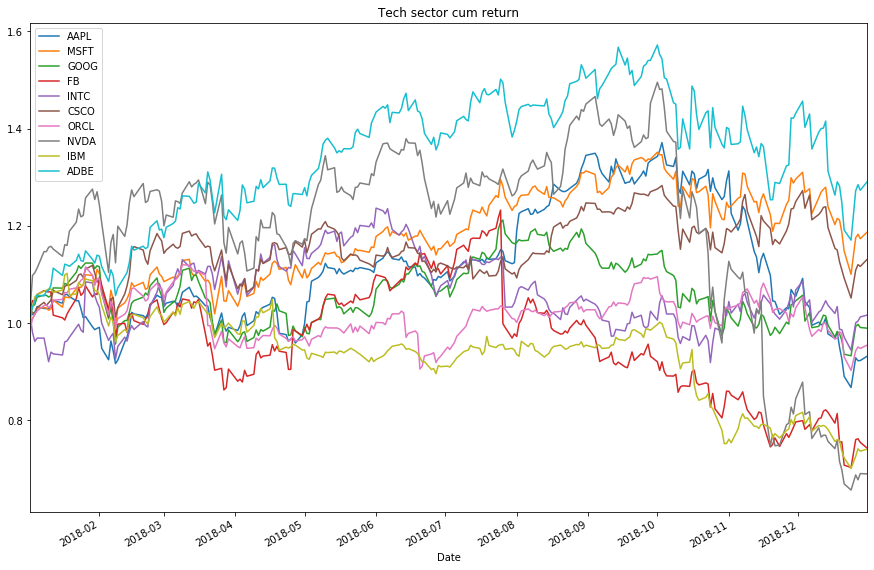

In [58]:
p=returns_cum[tickers_tech].plot(figsize=(15,10),title='Tech sector cum return')

### Инвестиционная привлекательность компаний исходя из фундаментальных показателей

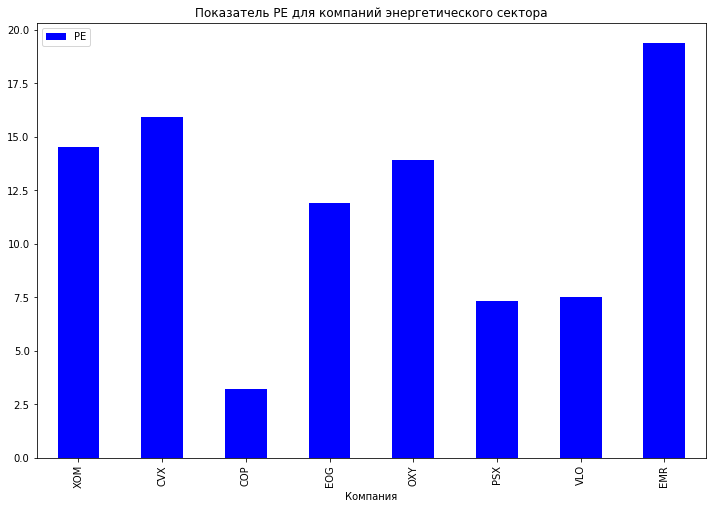

In [59]:
p=sample[(sample.Sector=='Energy')&(sample.PE>0)].plot(x='Ticker',y='PE',kind='bar',
title=u'Показатель PE для компаний энергетического сектора',figsize=(12,8),color=['blue'])
_=p.set(xlabel=u'Компания')

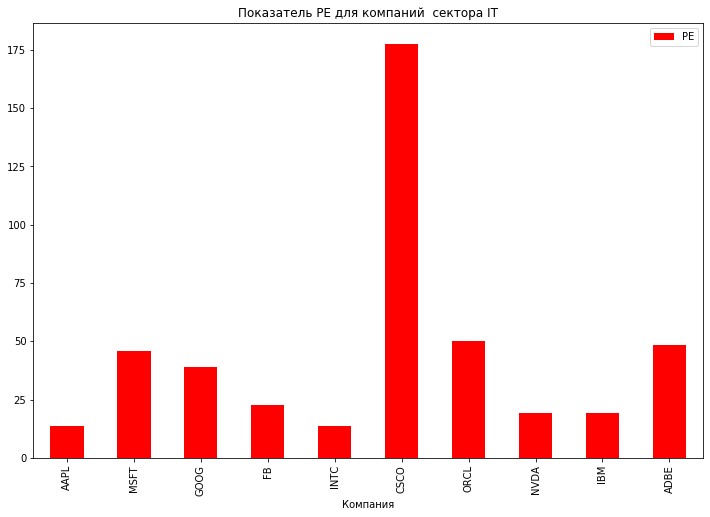

In [60]:
p=sample[(sample.Sector=='Technology')&(sample.PE>0)].plot(x='Ticker',y='PE',kind='bar',
title=u'Показатель PE для компаний  сектора IT',figsize=(12,8),color=['red'])
_=p.set(xlabel=u'Компания')

### Зависимость между фундаментальными показателями и рыночной доходностью

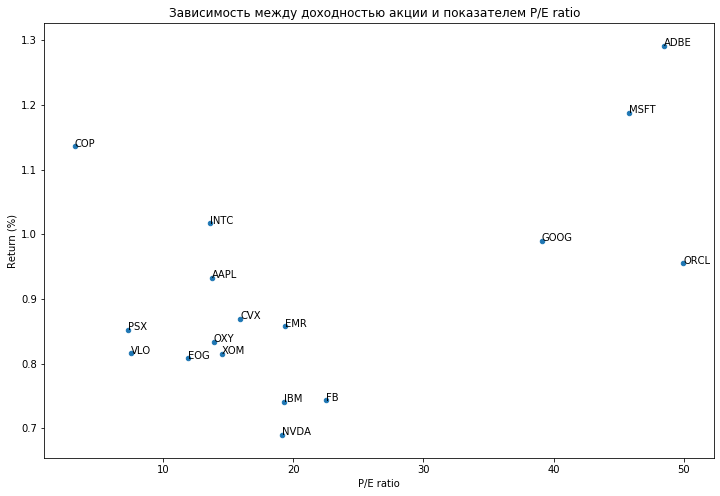

In [61]:
p=sample[(sample.PE>0)&(sample.PE<100)].plot.scatter(x='PE',y='Return',
title=u'Зависимость между доходностью акции и показателем P/E ratio  ',figsize=(12,8))
_=p.set(xlabel='P/E ratio',ylabel='Return (%)')
for  i, point in sample[(sample.PE>0)&(sample.PE<100)].iterrows():
    p.text(point['PE'], point['Return'], str(point['Ticker']))

### График скользящих средних (для примера взята компания Apple)

In [62]:
window_1=12
window_2=26

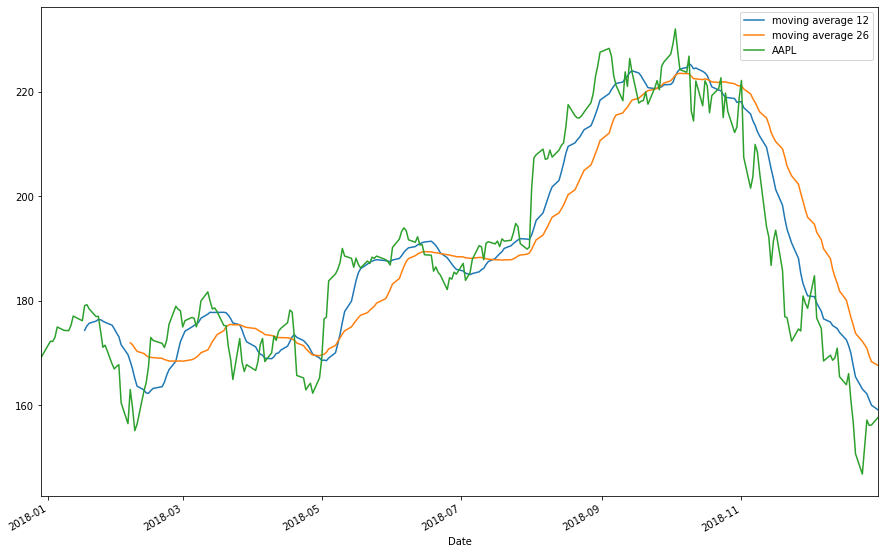

In [63]:
plt.figure(figsize=(15,10))
_=prices['AAPL'].rolling(window_1).mean().plot(label='moving average '+str(window_1))
_=prices['AAPL'].rolling(window_2).mean().plot(label='moving average '+str(window_2))
_=prices['AAPL'].plot()
_=plt.legend()

### График EWMA и торговые сигналы (для примера взята компания Apple)

In [64]:
df_ewm=pd.DataFrame(zip(prices['AAPL'].ewm(span=12).mean(),prices['AAPL'].ewm(span=26).mean()),\
          columns=['EWMA_12','EWMA_26'])
# вспомогательный массив для EWMA 

In [65]:
# зоны покупки и продажи
df_ewm['Buy'] = np.where( (df_ewm['EWMA_12']> df_ewm['EWMA_26']), 1, 0)
df_ewm['Sell'] = np.where( (df_ewm['EWMA_12']< df_ewm['EWMA_26']), 1, 0)

In [66]:
# сигналы покупки и продажи
df_ewm['Buy_ind'] = np.where( (df_ewm['Buy'] > df_ewm['Buy'].shift(1)),1,0)
df_ewm['Sell_ind'] = np.where( (df_ewm['Sell'] > df_ewm['Sell'].shift(1)),1,0)

In [67]:
df_ewm.index=prices.index

In [68]:
df_ewm['Price']=prices['AAPL']

In [69]:
df_ewm.head()

,EWMA_12,EWMA_26,Buy,Sell,Buy_ind,Sell_ind,Price
Date,,,,,,,
2017-12-29,169.229996,169.229996,0,0,0,0,169.229996
2018-01-02,170.871245,170.803264,1,0,1,0,172.259995
2018-01-03,171.401566,171.315875,1,0,0,0,172.229996
2018-01-04,171.915598,171.795069,1,0,0,0,173.029999
2018-01-05,172.753619,172.538306,1,0,0,0,175.000000


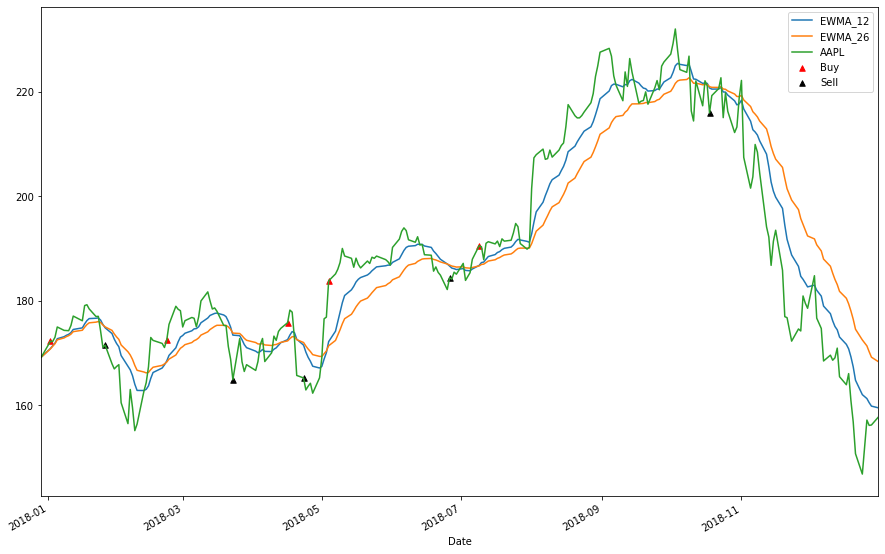

In [70]:
plt.figure(figsize=(15,10))
_=prices['AAPL'].ewm(span=window_1).mean().plot(label='EWMA_'+str(window_1))
_=prices['AAPL'].ewm(span=window_2).mean().plot(label='EWMA_'+str(window_2))
_=plt.scatter(df_ewm[df_ewm['Buy_ind'] ==1 ].index,df_ewm[df_ewm['Buy_ind'] ==1]['Price'], label='Buy', color='red', s=30, marker="^")
_=plt.scatter(df_ewm[df_ewm['Sell_ind'] ==1 ].index,df_ewm[df_ewm['Sell_ind'] ==1]['Price'], label='Sell', color='black', s=30, marker="^")
_=prices['AAPL'].plot()
_=plt.legend()

## Задание

### 1. Из прилагаемого файла выбрать не менее 15 компаний из двух и более секторов. 
### 2. Для выбранных компаний загрузить дневные котировки с сервера Yahoo Finance за 2018 г. (сохранить данные в отдельном файле).
### 3. Рассчитать доходности по акциям выбранных компаний для разных периодов.
### 4. Провести графический и первичный статистический анализ фундаментальных и рыночных показателей по выбранным компаниям по аналогии с разобранными примерами.
### 4. Сделать выводы.